In [1]:
!pip install stellargraph[demos]

  Using cached numpy-1.19.5-cp37-cp37m-manylinux2010_x86_64.whl (14.8 MB)


  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.0
    Uninstalling numpy-1.18.0:
      Successfully uninstalled numpy-1.18.0
  Rolling back uninstall of numpy
  Moving to /home/jovyan/.local/bin/f2py
   from /tmp/pip-uninstall-rmrhyj1n/f2py
  Moving to /home/jovyan/.local/bin/f2py3
   from /tmp/pip-uninstall-rmrhyj1n/f2py3
  Moving to /home/jovyan/.local/bin/f2py3.7
   from /tmp/pip-uninstall-rmrhyj1n/f2py3.7
  Moving to /home/jovyan/.local/lib/python3.7/site-packages/numpy-1.18.0.dist-info/
   from /home/jovyan/.local/lib/python3.7/site-packages/~umpy-1.18.0.dist-info
  Moving to /home/jovyan/.local/lib/python3.7/site-packages/numpy/
   from /home/jovyan/.local/lib/python3.7/site-packages/~-mpy
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: '/home/user/conda/lib/python3.7/site-packages/numpy/_distributor_init.py'
Consider using the `--user` option or check the permissions.



In [2]:
!git clone https://github.com/stellargraph/stellargraph/blob/develop/demos/node-classification/graphsage-inductive-node-classification.ipynb

fatal: destination path 'graphsage-inductive-node-classification.ipynb' already exists and is not an empty directory.


In [3]:
!pip install networkx

In [4]:
#!export PYTHONPATH=$PYTHONPATH:~/.local/lib/python3.7/site-packages

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import os
import random
from tqdm import tqdm

pd.set_option('display.max_columns', 500)
import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import GraphSAGELinkGenerator
from stellargraph.layer import GraphSAGE, link_classification
from stellargraph.data import UniformRandomWalk
from stellargraph.data import UnsupervisedSampler
from sklearn.model_selection import train_test_split
import networkx as nx
from stellargraph.mapper import GraphWaveGenerator
from stellargraph import StellarGraph
from sklearn.decomposition import PCA
import numpy as np
from matplotlib import pyplot as plt
from scipy.sparse.linalg import eigs
import tensorflow as tf
from tensorflow.keras import backend as K


from tensorflow import keras
from sklearn import preprocessing, feature_extraction, model_selection
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import accuracy_score

from stellargraph import globalvar

from stellargraph import datasets
from IPython.display import display, HTML

## DATASET PROCESING

Загружаем граф:

In [2]:
graph = pd.read_csv("graph_abakan_F_encoded.csv",index_col = 0)

Генерируем edge list:

In [50]:
def get_index_tuples(df):
    lst = []
    for i in tqdm(range(len(df))):
        tmp = df['adjacent'][i].split(',')
        for edge in tmp:
            lst.append([i, int(edge)])
            
    return lst
lst = get_index_tuples(graph)
lst = pd.DataFrame(lst)

100%|██████████| 65524/65524 [00:01<00:00, 50006.30it/s]


In [51]:
edge_data = pd.DataFrame(
    {
        "source": list(lst[0]),
        "target": list(lst[1])
    }
)

In [52]:
node_data = graph.drop(["edge_id", "adjacent", "style_<pandas.io.formats.style.Styler object at 0x000001B5DF375370>"], axis = 1)

Дропаем лишнее (структурное описание/копии индекса/артефакты): 

Создаем граф:

In [51]:
G = sg.StellarGraph(
    {"street": node_data}, {"connection": edge_data}
)
print(G.info())

NameError: name 'node_data' is not defined

In [3]:
from stellargraph.mapper import (
    CorruptedGenerator,
    FullBatchNodeGenerator,
    GraphSAGENodeGenerator,
    HinSAGENodeGenerator,
    ClusterNodeGenerator,
)
from stellargraph import StellarGraph
from stellargraph.layer import GCN, DeepGraphInfomax, GraphSAGE, GAT, APPNP, HinSAGE

from stellargraph import datasets
from stellargraph.utils import plot_history

import pandas as pd
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from IPython.display import display, HTML

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras import Model

In [136]:
fullbatch_generator = FullBatchNodeGenerator(G, sparse=False)
gcn_model = GCN(layer_sizes=[30], activations=["relu"], generator=fullbatch_generator)

corrupted_generator = CorruptedGenerator(fullbatch_generator)
gen = corrupted_generator.flow(G.nodes())

infomax = DeepGraphInfomax(gcn_model, corrupted_generator)
x_in, x_out = infomax.in_out_tensors()

model = Model(inputs=x_in, outputs=x_out)
model.compile(loss=tf.nn.sigmoid_cross_entropy_with_logits, optimizer=Adam(lr=1e-3))

epochs = 100

Using GCN (local pooling) filters...


Epoch 1/100
1/1 [==============================] - 26s 26s/step - loss: 75.2517
Epoch 2/100
1/1 [==============================] - 23s 23s/step - loss: 70.9935
Epoch 3/100
1/1 [==============================] - 24s 24s/step - loss: 66.7533
Epoch 4/100
1/1 [==============================] - 26s 26s/step - loss: 62.5212
Epoch 5/100
1/1 [==============================] - 25s 25s/step - loss: 58.2923
Epoch 6/100
1/1 [==============================] - 25s 25s/step - loss: 54.0668
Epoch 7/100
1/1 [==============================] - 24s 24s/step - loss: 49.8529
Epoch 8/100
1/1 [==============================] - 25s 25s/step - loss: 45.6619
Epoch 9/100
1/1 [==============================] - 26s 26s/step - loss: 41.5013
Epoch 10/100
1/1 [==============================] - 26s 26s/step - loss: 37.3752
Epoch 11/100
1/1 [==============================] - 25s 25s/step - loss: 33.2845
Epoch 12/100
1/1 [==============================] - 26s 26s/step - loss: 29.2278
Epoch 13/100
1/1 [===================

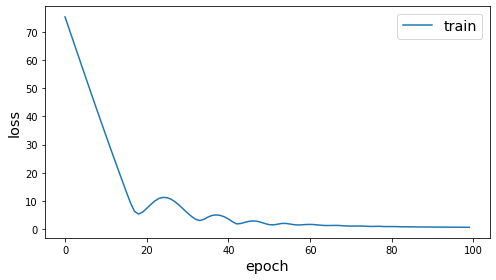

In [137]:
es = EarlyStopping(monitor="loss", min_delta=0, patience=20)
history = model.fit(gen, epochs=100, verbose=1, callbacks=[es])
plot_history(history)

In [48]:
x_emb_in, x_emb_out = gcn_model.in_out_tensors()

# for full batch models, squeeze out the batch dim (which is 1)
x_out = tf.squeeze(x_emb_out, axis=0)
emb_model = Model(inputs=x_emb_in, outputs=x_out)

NameError: name 'gcn_model' is not defined

In [139]:

gen = fullbatch_generator.flow(G.nodes())
embeddings = emb_model.predict(gen)

In [140]:
len(embeddings[0])

30

## CONCATENATE EMBEDDINGS

In [85]:
node_embeddings = embeddings

Загружаем файл с путями:

In [4]:
routes = pd.read_csv("abakan_full_routes_final_weather_L_NaN_filtered.csv", index_col = 0)

Дропаем лишние копии индекса (если они имеются):

In [5]:
c_routes = routes.drop(["index", "level_0","Unnamed: 0.1","Unnamed: 0.1.1","Unnamed: 0.1.1.1","Unnamed: 0.1.1.1.1"], axis = 1)
#c_routes = routes.drop(["Unnamed: 0.1","Unnamed: 0.1.1"], axis = 1)

In [6]:
c_routes

,dist_to_b,dist_to_a,start_timestamp,RTA,real_dist,pred_dist,rebuildCount,route_type,start_point_meters,finish_point_meters,start_point_part,finish_point_part,edges,time,speed,length,day_period,week_period,clouds,snow,temperature,wind,pressure
0,65,2,2020-12-14 16:00:22.0,757,2936,3495,2,traffic,1.0,25.0,0.785760,0.531041,"' 19423207912140509', ' 19423207912140505', ' ...","' 3360', ' 66600', ' 33720', ' 10500', ' 1700'...","' 15', ' 15', ' 15', ' 36', ' 36', ' 27', ' 26...","' 14', ' 90', ' 78', ' 55', ' 17', ' 147', ' 5...",2,0,1,0,-6,180,746
1,48,0,2020-12-12 10:11:27.0,501,4245,4163,2,traffic,6.0,16.0,0.722993,0.290994,"' 19423207912141719', ' 19423207912141691', ' ...","' 4800', ' 23160', ' 2640', ' 11840', ' 2700',...","' 15', ' 15', ' 15', ' 20', ' 20', ' 35', ' 40...","' 20', ' 34', ' 11', ' 38', ' 15', ' 62', ' 13...",1,0,1,0,-9,180,750
2,28,55,2020-12-06 12:21:17.0,372,3523,3514,0,traffic,5.0,25.0,0.554582,0.899702,"' 19423207912137899', ' 19423207912137895', ' ...","' 3120', ' 21000', ' 26351', ' 11793', ' 10303...","' 15', ' 15', ' 29', ' 29', ' 29', ' 29', ' 35...","' 13', ' 25', ' 172', ' 95', ' 83', ' 25', ' 1...",2,0,1,0,-21,315,752
3,81,2,2020-12-13 14:25:20.0,475,3787,4178,1,traffic,11.0,32.0,0.496820,0.434923,"' 19423207912142002', ' 19423207912142014', ' ...","' 8640', ' 8880', ' 15800', ' 960', ' 6080', '...","' 15', ' 15', ' 15', ' 15', ' 50', ' 45', ' 20...","' 36', ' 37', ' 45', ' 4', ' 15', ' 52', ' 90'...",2,0,5,2,-7,180,746
4,17,0,2020-12-04 17:43:41.0,643,4595,4672,0,traffic,1.0,10.0,0.566270,0.321134,"' 140060152264356559', ' 140060152264357499', ...","' 3840', ' 5280', ' 4080', ' 13400', ' 19926',...","' 15', ' 15', ' 15', ' 15', ' 19', ' 17', ' 17...","' 16', ' 22', ' 17', ' 35', ' 26', ' 35', ' 29...",2,0,3,0,-18,270,749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122360,72,0,2020-12-29 10:02:33.0,371,781,765,1,traffic,1.0,17.0,0.901433,0.920319,"' 19423207912137925', ' 19423207912126325', ' ...","' 960', ' 15675', ' 18822', ' 9154', ' 9360', ...","' 15', ' 29', ' 35', ' 35', ' 35', ' 15', ' 15...","' 4', ' 86', ' 183', ' 89', ' 91', ' 78', ' 90...",1,0,1,0,-26,0,758
122361,76,2,2020-12-25 16:17:11.0,329,1165,1191,2,traffic,41.0,71.0,0.429539,0.634195,"' 19423207912132093', ' 19423207912132309', ' ...","' 6640', ' 15840', ' 1440', ' 1728', ' 981', '...","' 45', ' 35', ' 20', ' 50', ' 33', ' 33', ' 40...","' 83', ' 154', ' 8', ' 24', ' 9', ' 157', ' 30...",2,0,1,0,-18,270,744
122362,54,18,2020-12-18 16:52:58.0,916,6542,6570,0,traffic,8.0,20.0,0.830191,0.582137,"' 140060152380920943', ' 19423207912122553', '...","' 2454', ' 3432', ' 12436', ' 39600', ' 7200',...","' 44', ' 43', ' 33', ' 45', ' 44', ' 49', ' 41...","' 30', ' 41', ' 114', ' 495', ' 88', ' 93', ' ...",2,0,1,0,-2,180,746
122363,30,0,2020-12-27 14:53:40.0,187,1145,1263,3,traffic,7.0,40.0,0.590148,0.460256,"' 19423207912140481', ' 19423207912140477', ' ...","' 6000', ' 10280', ' 6928', ' 385', ' 5528', '...","' 15', ' 15', ' 28', ' 28', ' 28', ' 28', ' 28...","' 25', ' 22', ' 15', ' 3', ' 43', ' 46', ' 54'...",2,1,1,0,-30,0,762


Дропаем лишние признаки:

In [7]:
X_pre = c_routes.drop(["real_dist","pred_dist","rebuildCount", "speed", "time", "length", "route_type","start_timestamp"], axis = 1) 

Проверяем индексацию:

In [8]:
X_pre = X_pre.reset_index().drop(["index"], axis = 1)

In [9]:
X_pre["edges"] = X_pre["edges"].map(lambda x: x.replace("'", ""))

In [10]:
X_pre.loc[22225, "edges"]

' 19423207912117260,  19423207912117248,  19423207912135772,  19423207912117176,  140060152264290208,  19423207912117002,  19423207912116940,  19423207912116882,  19423207912116876,  19423207912116780,  19423207912116706,  19423207912116656,  19423207912116542,  19423207912116526,  19423207912116500,  19423207912116482,  19423207912116412,  19423207912116272,  19423207912116457,  19423207912116663,  19423207912116845'

Процессим edges: (будет исправлено позднее)

In [11]:
def summ(first, second):
    return [x + y for x, y in zip(first, second)]

In [12]:
def prod(first, second):
    return [x*y for x, y in zip(first, second)]

In [13]:
def zerolistmaker(n):
    return [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,]

Размер эмбеддинга:

Определяем размер батча для распараллеливания построения эмбеддинга подграфа: 

In [47]:
pd.DataFrame(embeddings).to_csv("dgim_embedding07.csv")

NameError: name 'embeddings' is not defined

In [46]:
node_embeddings = pd.read_csv("dgim_embedding07.csv", index_col = 0)

In [15]:
workers_count = 27

In [16]:
emb_len = 30

In [17]:
emb_len

30

In [18]:
part_const = int(len(X_pre)/workers_count)
len(X_pre)/workers_count

4530.037037037037

In [19]:
node_embeddings

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,50.919823,17.176613,29.874540,0.0,0.000000,0.000000,0.0,6.458988,0.0,7.484752,10.678250,0.909067,0.0,0.0,0.0,57.104740,0.0,0.0,0.0,0.0,54.682453,8.802463,34.661674,0.0,0.000000,0.0,23.890800,0.0
1,0.0,0.0,65.794136,36.873867,42.028053,0.0,0.000000,0.000000,0.0,15.298467,0.0,10.638360,28.190186,11.560615,0.0,0.0,0.0,86.867836,0.0,0.0,0.0,0.0,78.940890,10.838081,43.977478,0.0,0.000000,0.0,24.790579,0.0
2,0.0,0.0,260.970100,342.112700,211.979390,0.0,70.773450,0.000000,0.0,153.416840,0.0,53.609570,304.672000,185.654190,0.0,0.0,0.0,517.603940,0.0,0.0,0.0,0.0,422.428440,34.141872,163.066640,0.0,0.000000,0.0,17.260754,0.0
3,0.0,0.0,215.777330,263.463200,170.583220,0.0,46.181393,0.000000,0.0,117.567250,0.0,43.119278,232.887760,139.910140,0.0,0.0,0.0,410.345950,0.0,0.0,0.0,0.0,338.128480,28.853695,135.847610,0.0,0.000000,0.0,21.991600,0.0
4,0.0,0.0,200.150120,241.260770,157.890210,0.0,40.962830,0.000000,0.0,107.758080,0.0,39.874115,212.882370,126.967840,0.0,0.0,0.0,378.906830,0.0,0.0,0.0,0.0,312.511600,27.333930,126.385320,0.0,0.000000,0.0,22.365790,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65519,0.0,0.0,28.500280,4.959274,16.551888,0.0,0.000000,0.000000,0.0,1.760324,0.0,3.726489,1.887250,0.000000,0.0,0.0,0.0,27.846375,0.0,0.0,0.0,0.0,27.907543,5.224372,19.679487,0.0,0.000000,0.0,15.055103,0.0
65520,0.0,0.0,24.484740,0.000000,12.924966,0.0,0.000000,0.000000,0.0,0.000000,0.0,2.800129,0.000000,0.000000,0.0,0.0,0.0,18.443213,0.0,0.0,0.0,0.0,20.495844,4.758401,17.257025,0.0,2.560851,0.0,15.430184,0.0
65521,0.0,0.0,28.628866,0.000000,15.280603,0.0,0.000000,0.000000,0.0,0.000000,0.0,3.325113,0.000000,0.000000,0.0,0.0,0.0,22.291770,0.0,0.0,0.0,0.0,24.421764,5.530524,20.127413,0.0,2.475845,0.0,17.710333,0.0
65522,0.0,0.0,27.812380,0.000000,14.878222,0.0,0.000000,0.000000,0.0,0.000000,0.0,3.240858,0.000000,0.000000,0.0,0.0,0.0,21.794071,0.0,0.0,0.0,0.0,23.813930,5.365440,19.545404,0.0,2.309300,0.0,17.142410,0.0


In [20]:
import multiprocessing as mp
import psutil

def spawn():
    dataframe_list = []
    procs = list()
    n_cpus = psutil.cpu_count()
    manager = mp.Manager()
    return_list = manager.list()
    
    for cpu in range(workers_count):
        d = dict(border = part_const*(cpu+1))
        p = mp.Process(target=run_child, args=(d, return_list))
        p.start()
        procs.append(p)
    for p in procs:
        p.join()
        print('joined')
    
    return return_list

def run_child(border, return_list):
    emb = []
    for i in tqdm(range(border['border'] - part_const, border['border'])):
        path_emb = zerolistmaker(emb_len)
#        print(X_pre.loc[i, "edges"])
        arr = X_pre.loc[i, "edges"].replace("'", "").split(",")
        for j in range(len(arr)):
            ind = graph[graph["edge_id"] == int(arr[j])].index
            if (len(ind) != 0):
                ind = graph[graph["edge_id"] == int(arr[j])].index[0]
#            else:
#                print(str(i) + " " + str(j) + " " + arr[j] + " "+ str(graph[graph["edge_id"] == int(arr[j])].index[0]))
                path_emb = summ(node_embeddings.loc[ind], path_emb)
            
#                print(path_emb)                
        path_emb = [x / len(arr) for x in path_emb]
        emb.append(path_emb)
    return_list.append([(int(border['border'])-part_const)/part_const, emb])
 #   print(border['border'])
#    df = pd.DataFrame(dataframe[(int(border['border'])-part_const):border['border']]).reset_index()
#    return_list.append([(int(border['border'])-part_const)/part_const,processing.flatternize(16, filepath = "", dataframe = df)])

In [21]:
a = spawn()  

 98%|█████████▊| 4453/4530 [11:08<00:04, 15.71it/s]

joined


 99%|█████████▉| 4487/4530 [11:09<00:02, 18.73it/s]

joined
joined
joined
joined


 99%|█████████▉| 4503/4530 [11:11<00:01, 19.61it/s]

joined


100%|██████████| 4530/4530 [11:12<00:00,  6.73it/s]


joined
joined
joined
joined
joined
joined
joined
joined
joined
joined
joined
joined
joined
joined
joined
joined
joined
joined
joined
joined
joined


In [22]:
len(a[0][1][0])

30

Собираем данные:

In [23]:
normal_container_s = []
for i in tqdm(range(len(a))):
    normal_container_s.append(a[i])
a_ = sorted(normal_container_s,key=lambda x: (x[0],x[1]))
a_c = a_.copy() 

100%|██████████| 27/27 [00:00<00:00, 36.33it/s]


In [24]:
a_ = sorted(normal_container_s,key=lambda x: (x[0],x[1]))

In [25]:
result = a_[0][1]
for i in range(1, len(a_)):
    result += a_[i][1]

In [26]:
len(result[222])

30

Технические проверки:

In [27]:
X_pre_c = X_pre.drop(X_pre[X_pre["snow"] == -1].index)

In [28]:
set(X_pre_c["day_period"])

{0, 1, 2, 3}

Объединяем данные путей с эмбеддингами, завершаем подготовку данных к обучению:

In [29]:
X = X_pre_c.join(pd.DataFrame(result)).dropna().drop(["edges"], axis = 1).reset_index(drop=True)

In [30]:
X

,dist_to_b,dist_to_a,RTA,start_point_meters,finish_point_meters,start_point_part,finish_point_part,day_period,week_period,clouds,snow,temperature,wind,pressure,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,65,2,757,1.0,25.0,0.785760,0.531041,2,0,1,0,-6,180,746,0.0,0.084965,18.098230,0.489441,8.685849,0.0,0.0,4.241955,0.119163,0.208186,0.0,1.886179,0.186293,0.000000,0.0,0.0,0.873713,10.787480,0.0,0.0,0.0,0.0,13.457412,4.020828,13.300550,0.0,3.685545,0.0,12.699950,0.0
1,48,0,501,6.0,16.0,0.722993,0.290994,1,0,1,0,-9,180,750,0.0,0.000000,16.141504,2.055041,9.284743,0.0,0.0,0.662117,0.000000,1.015183,0.0,2.235003,1.189625,0.060722,0.0,0.0,0.121016,14.457842,0.0,0.0,0.0,0.0,15.007457,3.906465,11.582338,0.0,0.985044,0.0,9.465959,0.0
2,28,55,372,5.0,25.0,0.554582,0.899702,2,0,1,0,-21,315,752,0.0,0.056979,15.078619,1.188532,8.166826,0.0,0.0,1.624473,0.073430,0.608675,0.0,1.894112,0.590907,0.000000,0.0,0.0,0.344144,11.817029,0.0,0.0,0.0,0.0,12.855308,3.754015,10.949153,0.0,1.613010,0.0,9.570871,0.0
3,81,2,475,11.0,32.0,0.496820,0.434923,2,0,5,2,-7,180,746,0.0,0.000000,20.723032,0.675978,10.648188,0.0,0.0,2.695777,0.005301,0.287577,0.0,2.479360,0.250033,0.000000,0.0,0.0,0.495918,14.455282,0.0,0.0,0.0,0.0,16.801739,4.530343,15.156569,0.0,3.117212,0.0,13.838889,0.0
4,17,0,643,1.0,10.0,0.566270,0.321134,2,0,3,0,-18,270,749,0.0,0.000000,19.323946,0.943364,9.699256,0.0,0.0,3.467770,0.011265,0.407389,0.0,2.140947,0.504002,0.040566,0.0,0.0,0.799115,13.046126,0.0,0.0,0.0,0.0,15.251033,4.199071,14.098915,0.0,3.254903,0.0,12.940580,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117800,44,0,161,4.0,16.0,0.688172,0.663870,0,0,5,2,-7,180,746,0.0,0.000000,24.819919,1.341836,13.292841,0.0,0.0,1.497757,0.000000,0.516119,0.0,2.825257,0.603154,0.000000,0.0,0.0,0.248124,20.024785,0.0,0.0,0.0,0.0,21.571215,5.002128,17.672145,0.0,2.144335,0.0,15.083843,0.0
117801,72,0,371,1.0,17.0,0.901433,0.920319,1,0,1,0,-26,0,758,0.0,0.000000,16.112345,0.890654,8.356570,0.0,0.0,0.664674,0.000000,0.555472,0.0,1.793053,0.616080,0.006298,0.0,0.0,0.000000,12.591774,0.0,0.0,0.0,0.0,13.609456,3.761015,11.634341,0.0,1.513505,0.0,9.803996,0.0
117802,76,2,329,41.0,71.0,0.429539,0.634195,2,0,1,0,-18,270,744,0.0,0.083217,21.313570,0.644067,11.091471,0.0,0.0,2.254528,0.123617,0.212749,0.0,2.478661,0.144771,0.000000,0.0,0.0,0.514377,15.599787,0.0,0.0,0.0,0.0,17.658448,4.503987,15.341251,0.0,2.572322,0.0,13.729799,0.0
117803,54,18,916,8.0,20.0,0.830191,0.582137,2,0,1,0,-2,180,746,0.0,0.004643,17.569021,0.718654,8.672169,0.0,0.0,3.922726,0.024888,0.322175,0.0,2.264998,0.423321,0.094527,0.0,0.0,0.760039,11.137743,0.0,0.0,0.0,0.0,13.483142,4.265200,13.107859,0.0,3.532846,0.0,12.816162,0.0


In [31]:
wind_dir_classes = pd.get_dummies(X.wind, prefix='wind_dir_class')
day_classes = pd.get_dummies(X.day_period, prefix='day_class')
Y = X["RTA"]
X = X.join(wind_dir_classes).join(day_classes).drop(["wind", "day_period", "RTA"], axis = 1)


In [32]:
X

,dist_to_b,dist_to_a,start_point_meters,finish_point_meters,start_point_part,finish_point_part,week_period,clouds,snow,temperature,pressure,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,wind_dir_class_0,wind_dir_class_45,wind_dir_class_90,wind_dir_class_135,wind_dir_class_180,wind_dir_class_225,wind_dir_class_270,wind_dir_class_315,day_class_0,day_class_1,day_class_2,day_class_3
0,65,2,1.0,25.0,0.785760,0.531041,0,1,0,-6,746,0.0,0.084965,18.098230,0.489441,8.685849,0.0,0.0,4.241955,0.119163,0.208186,0.0,1.886179,0.186293,0.000000,0.0,0.0,0.873713,10.787480,0.0,0.0,0.0,0.0,13.457412,4.020828,13.300550,0.0,3.685545,0.0,12.699950,0.0,0,0,0,0,1,0,0,0,0,0,1,0
1,48,0,6.0,16.0,0.722993,0.290994,0,1,0,-9,750,0.0,0.000000,16.141504,2.055041,9.284743,0.0,0.0,0.662117,0.000000,1.015183,0.0,2.235003,1.189625,0.060722,0.0,0.0,0.121016,14.457842,0.0,0.0,0.0,0.0,15.007457,3.906465,11.582338,0.0,0.985044,0.0,9.465959,0.0,0,0,0,0,1,0,0,0,0,1,0,0
2,28,55,5.0,25.0,0.554582,0.899702,0,1,0,-21,752,0.0,0.056979,15.078619,1.188532,8.166826,0.0,0.0,1.624473,0.073430,0.608675,0.0,1.894112,0.590907,0.000000,0.0,0.0,0.344144,11.817029,0.0,0.0,0.0,0.0,12.855308,3.754015,10.949153,0.0,1.613010,0.0,9.570871,0.0,0,0,0,0,0,0,0,1,0,0,1,0
3,81,2,11.0,32.0,0.496820,0.434923,0,5,2,-7,746,0.0,0.000000,20.723032,0.675978,10.648188,0.0,0.0,2.695777,0.005301,0.287577,0.0,2.479360,0.250033,0.000000,0.0,0.0,0.495918,14.455282,0.0,0.0,0.0,0.0,16.801739,4.530343,15.156569,0.0,3.117212,0.0,13.838889,0.0,0,0,0,0,1,0,0,0,0,0,1,0
4,17,0,1.0,10.0,0.566270,0.321134,0,3,0,-18,749,0.0,0.000000,19.323946,0.943364,9.699256,0.0,0.0,3.467770,0.011265,0.407389,0.0,2.140947,0.504002,0.040566,0.0,0.0,0.799115,13.046126,0.0,0.0,0.0,0.0,15.251033,4.199071,14.098915,0.0,3.254903,0.0,12.940580,0.0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117800,44,0,4.0,16.0,0.688172,0.663870,0,5,2,-7,746,0.0,0.000000,24.819919,1.341836,13.292841,0.0,0.0,1.497757,0.000000,0.516119,0.0,2.825257,0.603154,0.000000,0.0,0.0,0.248124,20.024785,0.0,0.0,0.0,0.0,21.571215,5.002128,17.672145,0.0,2.144335,0.0,15.083843,0.0,0,0,0,0,1,0,0,0,1,0,0,0
117801,72,0,1.0,17.0,0.901433,0.920319,0,1,0,-26,758,0.0,0.000000,16.112345,0.890654,8.356570,0.0,0.0,0.664674,0.000000,0.555472,0.0,1.793053,0.616080,0.006298,0.0,0.0,0.000000,12.591774,0.0,0.0,0.0,0.0,13.609456,3.761015,11.634341,0.0,1.513505,0.0,9.803996,0.0,1,0,0,0,0,0,0,0,0,1,0,0
117802,76,2,41.0,71.0,0.429539,0.634195,0,1,0,-18,744,0.0,0.083217,21.313570,0.644067,11.091471,0.0,0.0,2.254528,0.123617,0.212749,0.0,2.478661,0.144771,0.000000,0.0,0.0,0.514377,15.599787,0.0,0.0,0.0,0.0,17.658448,4.503987,15.341251,0.0,2.572322,0.0,13.729799,0.0,0,0,0,0,0,0,1,0,0,0,1,0
117803,54,18,8.0,20.0,0.830191,0.582137,0,1,0,-2,746,0.0,0.004643,17.569021,0.718654,8.672169,0.0,0.0,3.922726,0.024888,0.322175,0.0,2.264998,0.423321,0.094527,0.0,0.0,0.760039,11.137743,0.0,0.0,0.0,0.0,13.483142,4.265200,13.107859,0.0,3.532846,0.0,12.816162,0.0,0,0,0,0,1,0,0,0,0,0,1,0


In [33]:
set(X['week_period'])

{0, 1}

Модель #1:

In [34]:
from sklearn.linear_model import ElasticNetCV
model = ElasticNetCV()

In [35]:
prediction = model.fit(X.iloc[0:100000, :], list(Y[0:100000]))

/home/jovyan/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
a_RMSE = mean_squared_error(Y[100000:110000], prediction.predict(X.iloc[100000:110000, :]))
a_MAE = mean_absolute_error(Y[100000:110000], prediction.predict(X.iloc[100000:110000, :]))
pd.DataFrame([[a_RMSE, a_MAE]], index = ["Abakan"], columns = ["RMSE", "MAE"])

,RMSE,MAE
Abakan,185897.221139,246.732229


Модель #2:

In [38]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [39]:
modelNN = tf.keras.models.Sequential()
modelNN.add(tf.keras.Input(shape=(53,)))
modelNN.add(tf.keras.layers.Dense(128, activation='relu'))
modelNN.add(tf.keras.layers.Dense(128*2, activation='relu'))
modelNN.add(tf.keras.layers.Dense(128*4, activation='relu'))
modelNN.add(tf.keras.layers.Dense(1))

In [40]:
modelNN.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [41]:
len(X)

117805

In [42]:
train_x = np.asarray(X.iloc[0:100000, 0:72])
train_y = np.asarray(Y[0:100000])

In [43]:
test_x = np.asarray(X.iloc[100000:140000, 0:72])
test_y = np.asarray(Y[100000:140000])

In [44]:
from  tensorflow.keras.utils import normalize, to_categorical
train_x = normalize(train_x, axis=1)
test_x =  normalize(test_x, axis=1)

In [45]:
historyNN = modelNN.fit(train_x, train_y, epochs = 60)

Epoch 1/60
3125/3125 [==============================] - 7s 2ms/step - loss: 247.9331
Epoch 2/60
3125/3125 [==============================] - 7s 2ms/step - loss: 235.2099
Epoch 3/60
3125/3125 [==============================] - 7s 2ms/step - loss: 230.6553
Epoch 4/60
3125/3125 [==============================] - 7s 2ms/step - loss: 230.1053
Epoch 5/60
3125/3125 [==============================] - 7s 2ms/step - loss: 222.2902
Epoch 6/60
3125/3125 [==============================] - 7s 2ms/step - loss: 220.8925
Epoch 7/60
3125/3125 [==============================] - 7s 2ms/step - loss: 222.3453
Epoch 8/60
3125/3125 [==============================] - 7s 2ms/step - loss: 219.6382
Epoch 9/60
3125/3125 [==============================] - 7s 2ms/step - loss: 217.8421
Epoch 10/60
3125/3125 [==============================] - 7s 2ms/step - loss: 219.2487
Epoch 11/60
3125/3125 [==============================] - 7s 2ms/step - loss: 217.8660
Epoch 12/60
3125/3125 [==============================] - 7s 2ms

In [132]:
result = modelNN.evaluate(
    test_x,
    test_y, verbose=0)

In [133]:
result

204.1065673828125

In [117]:
test_x

array([[0.08412627, 0.        , 0.00133534, ..., 0.        , 0.        ,
        0.00133534],
       [0.07878444, 0.        , 0.00393922, ..., 0.        , 0.00131307,
        0.        ],
       [0.0698243 , 0.05928478, 0.00131744, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.10098247, 0.00265743, 0.05447739, ..., 0.        , 0.        ,
        0.00132872],
       [0.07214263, 0.02404754, 0.0106878 , ..., 0.        , 0.        ,
        0.00133597],
       [0.03925184, 0.        , 0.00915876, ..., 0.        , 0.        ,
        0.00130839]])